In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('cleaned_complete.csv')

In [4]:
df

,Unnamed: 0.1,Unnamed: 0,index,propertyTypes,bathrooms,bedrooms,carspaces,dateUpdated,dateListed,geoLocation,...,Earners (persons),Median age of earners (years),Sum ($),Median ($),Mean ($),Male,Female,Person,Male Ratio,Female Ratio
0,0,0,0,['apartmentUnitFlat'],1.0,1.0,0.0,2019-01-09T00:23:18.123Z,2016-02-16T04:33:49Z,"{""latitude"": -37.8341628, ""longitude"": 144.960...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,9,['house'],2.0,2.0,1.0,2019-01-11T17:10:21.69Z,2018-10-24T23:20:07Z,"{""latitude"": -37.8350754, ""longitude"": 144.964...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,10,['apartmentUnitFlat'],1.0,2.0,0.0,2019-01-03T02:02:17.513Z,2018-10-25T00:57:25Z,"{""latitude"": -37.8402171, ""longitude"": 144.960...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,11,['house'],1.0,3.0,0.0,2019-01-03T17:06:05.923Z,2018-10-25T22:30:15Z,"{""latitude"": -37.8366529, ""longitude"": 144.953...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,21,['house'],2.0,2.0,0.0,2019-01-12T17:10:42.533Z,2018-10-31T22:21:33Z,"{""latitude"": -37.8375202, ""longitude"": 144.949...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100634,114955,114955,116020,['house'],1.0,3.0,1.0,2022-05-02T23:02:33.327Z,2022-04-06T22:38:28Z,"{""latitude"": -36.5365807, ""longitude"": 147.493...",...,3701.919198,52.806122,2.014328e+08,41650.108033,54273.677385,3156.644619,3024.668177,6181.185987,0.510686,0.489335
100635,114956,114956,116027,['house'],1.0,3.0,1.0,2022-06-28T07:34:34.59Z,2022-05-09T04:58:56Z,"{""latitude"": -36.5361943, ""longitude"": 147.494...",...,3701.919198,52.806122,2.014328e+08,41650.108033,54273.677385,3156.644619,3024.668177,6181.185987,0.510686,0.489335
100636,114957,114957,116052,['house'],1.0,3.0,2.0,2022-08-31T04:22:36.17Z,2022-08-18T06:04:32Z,"{""latitude"": -36.2218206, ""longitude"": 147.258...",...,3701.919198,52.806122,2.014328e+08,41650.108033,54273.677385,3156.644619,3024.668177,6181.185987,0.510686,0.489335
100637,114958,114958,116246,['house'],1.0,3.0,2.0,2021-03-09T00:53:53.08Z,2021-02-15T22:36:56Z,"{""latitude"": -36.2147158, ""longitude"": 147.177...",...,3701.919198,52.579590,1.950317e+08,41169.005468,52760.601328,3150.000000,3003.000000,6153.000000,0.511945,0.488055


In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'index', 'propertyTypes', 'bathrooms',
       'bedrooms', 'carspaces', 'dateUpdated', 'dateListed', 'geoLocation',
       'landAreaSqm', 'postcode', 'surburb', 'year', 'month', 'price', 'bond',
       'rent', 'longitude', 'latitude', 'geometry', 'index_right',
       'SA2_maincode_2021', 'distance of the closest bus stop',
       'count of bus stop', 'distance of the closest train stop',
       'count of train stop', 'distance of the closest tram stop',
       'count of tram stop', 'distance of the closest vline stop',
       'count of vline stop', 'distance of the closest school',
       'count of school', 'count of hospital',
       'distance to the closest shopping mall', 'count of shopping mall',
       'bench', 'cafe', 'childcare', 'fast_food', 'kindergarten', 'parking',
       'restaurant', 'place_of_worship', 'school', 'university', 'garden',
       'park', 'playground', 'pitch', 'offence count', 'incidents recorded',
       'Population ', 'P

In [6]:
import xgboost as xgb

D:\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [46]:
X = df.loc[:,['bathrooms',
       'bedrooms', 'carspaces', 'year',
       'count of bus stop', 
       'count of train stop',
       'count of tram stop', 
       'count of vline stop',
       'count of school', 'count of hospital', 'count of shopping mall',
       'bench', 'cafe', 'childcare', 'fast_food', 'kindergarten', 'parking',
       'restaurant', 'place_of_worship', 'school', 'university', 'garden']]

In [47]:
y = df.loc[:, ['Median ($)']]

## dropping the missing values

In [50]:
mask = y.dropna().index

y0 = y.dropna()

In [51]:
X0 = X.loc[mask]

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X0, y0, test_size=0.2, random_state=123)

In [53]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [55]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[08:55:01] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [56]:
preds

array([37031.863, 35252.527, 36194.05 , ..., 32535.861, 45057.285,
       38598.324], dtype=float32)

In [59]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 21461.770361


In [60]:
import matplotlib.pyplot as plt

In [66]:
len(preds)

12645

In [64]:
y_train

,Median ($)
41181,64139.179783
94308,50308.049013
79146,49364.302300
87123,68879.949392
57767,42673.868649
...,...
98517,48944.567351
29820,62129.895751
46634,42849.630901
27815,57277.846892


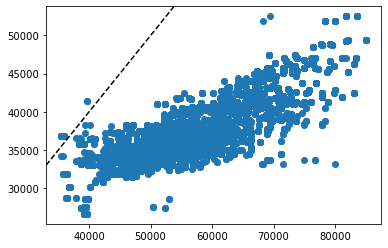

In [72]:
plt.scatter(y_test, preds)
plt.axline((40000,40000), slope = 1, color= 'black', linestyle = '--')

In [76]:
predX = xg_reg.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, predX))
print("RMSE: %f" % (rmse))

RMSE: 21500.735158


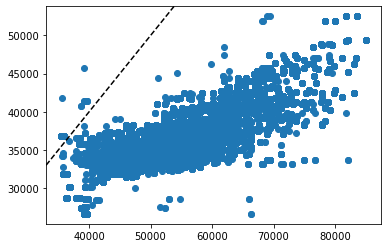

In [74]:
plt.scatter(y_train, predX)
plt.axline((40000,40000), slope = 1, color= 'black', linestyle = '--')